In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 23kB/s 
     |████████████████████████████████| 6.6MB 71.9MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 276kB 9.3MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=d8296bbddd64ee2f0475c2cba712e00ac7e19329d09be1a0b31a2a482380026a
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Fri Sep 18 02:58:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    25W / 300W |     10MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# install detectron2:
!pip install detectron2==0.1.2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 687kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20200912-cp36-none-any.whl size=43996 sha256=bf8820612c28522d297019462634f135f31586406ff7d35c4a857c7cc301d4ee
  Stored in directory: /root/.cache/pip/wheels/34/41/7b/f0a0b5800bea0474ae553342bde52093fdd5852764463aa2ec
Successfully built fvcore


In [ ]:
!pip install tensorboardX

     |████████████████████████████████| 317kB 5.7MB/s 


In [ ]:
import cv2
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
import random
from detectron2.utils.visualizer import Visualizer
from detectron2.engine.defaults import DefaultPredictor
from detectron2.utils.visualizer import ColorMode
from google.colab.patches import cv2_imshow
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.utils.logger import setup_logger
import tensorboardX
setup_logger()
from detectron2 import model_zoo

In [ ]:
!gdown https://drive.google.com/uc?id=1xxhOBpk98STOv1vbTrE2l7Ht9sXxpreE

Downloading...
From: https://drive.google.com/uc?id=1xxhOBpk98STOv1vbTrE2l7Ht9sXxpreE
To: /content/data_dataset_coco_train.zip
182MB [00:01, 99.9MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1YpDxJ54TwnjKXFFZ50mPf1yV7CL00lcy

Downloading...
From: https://drive.google.com/uc?id=1YpDxJ54TwnjKXFFZ50mPf1yV7CL00lcy
To: /content/data_dataset_coco_test.zip
18.5MB [00:00, 70.0MB/s]


In [ ]:
!unzip data_dataset_coco_test.zip

Archive:  data_dataset_coco_test.zip
   creating: data_dataset_coco_test/
   creating: data_dataset_coco_test/JPEGImages/
  inflating: data_dataset_coco_test/JPEGImages/010968.jpg  
  inflating: data_dataset_coco_test/JPEGImages/009989.jpg  
  inflating: data_dataset_coco_test/JPEGImages/006986.jpg  
  inflating: data_dataset_coco_test/JPEGImages/007984.jpg  
  inflating: data_dataset_coco_test/JPEGImages/007937.jpg  
  inflating: data_dataset_coco_test/JPEGImages/006000.jpg  
  inflating: data_dataset_coco_test/JPEGImages/007931.jpg  
  inflating: data_dataset_coco_test/JPEGImages/006916.jpg  
  inflating: data_dataset_coco_test/JPEGImages/007991.jpg  
  inflating: data_dataset_coco_test/JPEGImages/006904.jpg  
  inflating: data_dataset_coco_test/JPEGImages/009964.jpg  
  inflating: data_dataset_coco_test/JPEGImages/009921.jpg  
  inflating: data_dataset_coco_test/JPEGImages/009938.jpg  
  inflating: data_dataset_coco_test/JPEGImages/009949.jpg  
  inflating: data_dataset_coco_test/JP

In [ ]:
!unzip data_dataset_coco_train.zip

Archive:  data_dataset_coco_train.zip
   creating: data_dataset_coco_train/
   creating: data_dataset_coco_train/JPEGImages/
  inflating: data_dataset_coco_train/JPEGImages/006494.jpg  
  inflating: data_dataset_coco_train/JPEGImages/009623.jpg  
  inflating: data_dataset_coco_train/JPEGImages/006732.jpg  
  inflating: data_dataset_coco_train/JPEGImages/010543.jpg  
  inflating: data_dataset_coco_train/JPEGImages/006498.jpg  
  inflating: data_dataset_coco_train/JPEGImages/007098.jpg  
  inflating: data_dataset_coco_train/JPEGImages/005857.jpg  
  inflating: data_dataset_coco_train/JPEGImages/009129.jpg  
  inflating: data_dataset_coco_train/JPEGImages/007512.jpg  
  inflating: data_dataset_coco_train/JPEGImages/009597.jpg  
  inflating: data_dataset_coco_train/JPEGImages/010345.jpg  
  inflating: data_dataset_coco_train/JPEGImages/010335.jpg  
  inflating: data_dataset_coco_train/JPEGImages/007433.jpg  
  inflating: data_dataset_coco_train/JPEGImages/005261.jpg  
  inflating: data_dat

In [ ]:
!ls

data_dataset_coco_test	    data_dataset_coco_train	 sample_data
data_dataset_coco_test.zip  data_dataset_coco_train.zip


In [ ]:
!pwd

/content


In [ ]:
register_coco_instances("trash_dataset_train", {}, "data_dataset_coco_train/annotations.json", "data_dataset_coco_train/")
#print(register_coco_instances)

In [ ]:
register_coco_instances("trash_dataset_test", {}, "data_dataset_coco_test/annotations.json", "data_dataset_coco_test/")
print(register_coco_instances)

<function register_coco_instances at 0x7f7f841041e0>


In [ ]:
#register_coco_instances("trash_dataset_infer", {}, "detectron2_trash/trash_coco_test/annotations.json", "detectron2_trash/User/")
#print(register_coco_instances)

In [ ]:
trash_dataset_train_metadata = MetadataCatalog.get("trash_dataset_train")
trash_dataset_test_metadata = MetadataCatalog.get("trash_dataset_test")
#trash_dataset_infer_metadata = MetadataCatalog.get("trash_dataset_infer")


In [ ]:
print(trash_dataset_train_metadata)
print(trash_dataset_test_metadata)
#print(trash_dataset_infer_metadata)

Metadata(evaluator_type='coco', image_root='data_dataset_coco_train/', json_file='data_dataset_coco_train/annotations.json', name='trash_dataset_train')
Metadata(evaluator_type='coco', image_root='data_dataset_coco_test/', json_file='data_dataset_coco_test/annotations.json', name='trash_dataset_test')


WARNING [09/18 02:59:10 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/18 02:59:10 d2.data.datasets.coco]: Loaded 4500 images in COCO format from data_dataset_coco_train/annotations.json
Metadata(evaluator_type='coco', image_root='data_dataset_coco_train/', json_file='data_dataset_coco_train/annotations.json', name='trash_dataset_train', thing_classes=['Transparent Bottle', 'Opaque Bottle', 'Plastic Pot', 'Transparent Plastic', 'Couloured Plastic', 'Cartoon Packaging', 'Paper', 'Metal', 'Glass'], thing_dataset_id_to_contiguous_id={0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8})


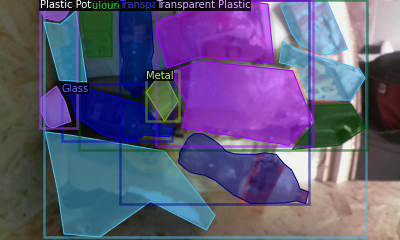

Metadata(evaluator_type='coco', image_root='data_dataset_coco_train/', json_file='data_dataset_coco_train/annotations.json', name='trash_dataset_train', thing_classes=['Transparent Bottle', 'Opaque Bottle', 'Plastic Pot', 'Transparent Plastic', 'Couloured Plastic', 'Cartoon Packaging', 'Paper', 'Metal', 'Glass'], thing_dataset_id_to_contiguous_id={0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8})


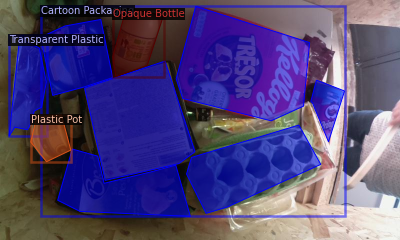

Metadata(evaluator_type='coco', image_root='data_dataset_coco_train/', json_file='data_dataset_coco_train/annotations.json', name='trash_dataset_train', thing_classes=['Transparent Bottle', 'Opaque Bottle', 'Plastic Pot', 'Transparent Plastic', 'Couloured Plastic', 'Cartoon Packaging', 'Paper', 'Metal', 'Glass'], thing_dataset_id_to_contiguous_id={0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8})


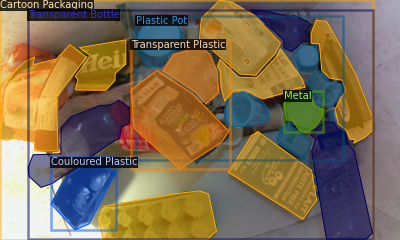

In [ ]:

dataset_dicts = DatasetCatalog.get("trash_dataset_train")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    print(trash_dataset_train_metadata)
    visualizer = Visualizer(img[:, :, ::-1], metadata=trash_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2.imwrite("img.png",vis.get_image()[:, :, ::-1])
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from torch.utils.tensorboard import SummaryWriter
cfg = get_cfg()
#cfg.merge_from_file("detectron2_trash/detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("trash_dataset_train",)
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
#cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.OUTPUT_DIR = "/content/drive/My Drive/trash"
cfg.SOLVER.MAX_ITER = (
    4
)  # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    512
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 9  # 17 Classes for our trash dataset Category
cfg.MODEL.PROPOSAL_GENERATOR.MIN_SIZE = 1
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
writer = SummaryWriter(logs_base_dir+'/dummy')

NameError: ignored

In [ ]:
#model_save_name = 'classifier.pt'
#path = F"/content/gdrive/My Drive/{model_save_name}" 
#%tensorboard --logdir {logs_base_dir}
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)


[09/18 03:01:07 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:16, 10.6MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (10, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (10,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (36, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (36,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due 

In [ ]:
trainer.train()

[09/18 03:13:21 d2.engine.train_loop]: Starting training from iteration 0
[09/18 03:13:22 d2.utils.events]:  eta: 0:00:00  iter: 3  total_loss: 3.419  loss_cls: 2.267  loss_box_reg: 0.331  loss_mask: 0.693  loss_rpn_cls: 0.018  loss_rpn_loc: 0.082  time: 0.2362  data_time: 0.0400  lr: 0.000080  max_mem: 2759M
[09/18 03:13:24 d2.engine.hooks]: Overall training speed: 1 iterations in 0:00:00 (0.4725 s / it)
[09/18 03:13:24 d2.engine.hooks]: Total training time: 0:00:02 (0:00:01 on hooks)


In [ ]:
import torchsummary as summary

In [ ]:
summary(cfg.MODEL,(3,256,256))

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
#%tensorboard --logdir output

In [ ]:
!ls /content/drive/My\ Drive/trash/

events.out.tfevents.1596211962.7360c73e3275.137.1  metrics.json
last_checkpoint					   model_final.pth


In [ ]:
!rm -rf current/

In [ ]:
!mkdir current

In [ ]:
!ls /content/drive/

'My Drive'   trash_save


In [ ]:
!cp -r /content/drive/My\ Drive/trash/ /content/drive/My\ Drive/trash

In [ ]:
!ls current/trash/

ls: cannot access 'current/trash/': No such file or directory


In [ ]:
!ls

data_dataset_coco_test	     drive		    model_final.pth
data_dataset_coco_test.zip   img.png		    sample_data
data_dataset_coco_train      logs
data_dataset_coco_train.zip  model_final_10000.pth


In [ ]:
print(cfg.OUTPUT_DIR)
cfg.MODEL.WEIGHTS = "model_final_1000.pth"
#cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final_50k.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4  # set the testing threshold for this model
cfg.DATASETS.TEST = ("trash_dataset_test", )
predictor = DefaultPredictor(cfg)

/content/drive/My Drive/trash


In [ ]:
dataset_dicts_test = DatasetCatalog.get("trash_dataset_test")

WARNING [07/31 16:23:30 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/31 16:23:30 d2.data.datasets.coco]: Loaded 450 images in COCO format from data_dataset_coco_test/annotations.json


In [ ]:
import os
for subdir, dirs, files in os.walk('/home/cpasfichu/projects/detectron2_trash/User/'):
    for file in files:
        print(subdir)
        print(file)
        file_final = subdir + file
        im = cv2.imread(file_final)
        print("File_name",d["file_name"])
        outputs = predictor(im)
        v = Visualizer(im[:, :, ::-1],metadata=trash_dataset_infer_metadata, scale=0.8, instance_mode=ColorMode.IMAGE_BW)
        v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        cv2_imshow(v.get_image()[:, :, ::-1])
        file_final_res = subdir + "result/" +  file
        cv2.imwrite(file_final_res,v.get_image()[:, :, ::-1])

File_name data_dataset_coco_test/JPEGImages/010975.jpg


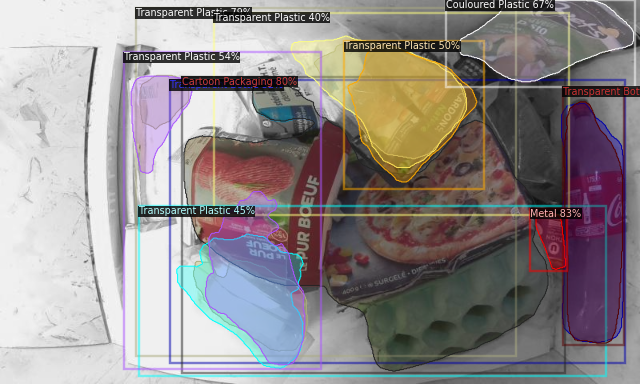

File_name data_dataset_coco_test/JPEGImages/007923.jpg


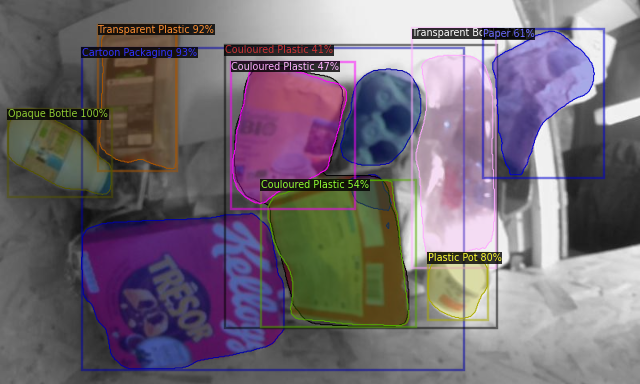

File_name data_dataset_coco_test/JPEGImages/007958.jpg


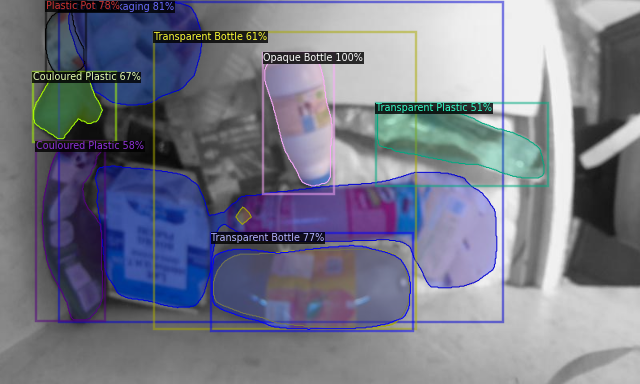

In [ ]:
for d in random.sample(dataset_dicts_test, 3):    
    im = cv2.imread(d["file_name"])
    print("File_name",d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=trash_dataset_test_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
evaluator = COCOEvaluator("trash_dataset_test", cfg, False, output_dir="./output_val/")
val_loader = build_detection_test_loader(cfg, "trash_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)
# another equivalent way is to use trainer.test

WARNING [07/29 00:42:06 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/29 00:42:06 d2.data.datasets.coco]: Loaded 450 images in COCO format from data_dataset_coco_test/annotations.json
[07/29 00:42:06 d2.data.common]: Serializing 450 elements to byte tensors and concatenating them all ...
[07/29 00:42:06 d2.data.common]: Serialized dataset takes 1.22 MiB
[07/29 00:42:06 d2.evaluation.evaluator]: Start inference on 450 images
[07/29 00:42:08 d2.evaluation.evaluator]: Inference done 11/450. 0.0867 s / img. ETA=0:01:00
[07/29 00:42:13 d2.evaluation.evaluator]: Inference done 46/450. 0.0878 s / img. ETA=0:00:58
[07/29 00:42:18 d2.evaluation.evaluator]: Inference done 82/450. 0.0875 s / img. ETA=0:00:52
[07/29 00:42:23 d2.evaluation.evaluator]: Inference done 118/450. 0.0873 s / img. ETA=0:00:46
[07/29 00:42:28 d2.evaluation.evaluator]: Inference done 154/450. 0.0874 s / img. ETA=0:00:41
[07/29 00:42:33 d2.evaluation.eva

OrderedDict([('bbox',
              {'AP': 27.05772176769395,
               'AP-Cartoon Packaging': 38.48966071133649,
               'AP-Couloured Plastic': 11.828938199023048,
               'AP-Glass': 44.0951511043045,
               'AP-Metal': 29.74473878621653,
               'AP-Opaque Bottle': 57.186388707681665,
               'AP-Paper': 13.857283992902689,
               'AP-Plastic Pot': 12.263142877644679,
               'AP-Transparent Bottle': 22.918132334961957,
               'AP-Transparent Plastic': 13.136059195174019,
               'AP50': 51.24724285760864,
               'AP75': 25.949643810229944,
               'APl': 22.639247596479763,
               'APm': 28.793076218159552,
               'APs': 0.0}),
             ('segm',
              {'AP': 27.210815336280668,
               'AP-Cartoon Packaging': 30.431502445288995,
               'AP-Couloured Plastic': 10.436989122005151,
               'AP-Glass': 42.58849264906047,
               'AP-Metal': 32

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

In [1]:
!ls /content/drive/trash_save/

ls: cannot access '/content/drive/trash_save/': No such file or directory


In [ ]:
!ls /content/drive/trash_save/My\ Drive

 02:12:19			   logocarre.png
 10001-11000.tar.gz		   Meeting.gdoc
 29:12:2019			   MIT.mp4
 5001-6000.tar.gz		   MIT.pptx
 6001-7000.tar.gz		  'Présentation climate launchpad.gslides'
 7001-8000.tar.gz		   quo_19050928717_1905101702.pdf
 9001-10000.tar.gz		   RETRANSCRITION
 9001-11000.tar.gz		  'Sample '
 AUDIO				   Sample1
 ava_step.pth			   Sample2
'carte vincent .png'		   Sample3
'Colab Notebooks'		  'Sample 4'
'DOCUMENT APP.docx'		  'Sample 5'
'ENSEA Internship'		  'Sample second model'
'ficha a besoin de vous !.gform'  'Signature Vincent  .png'
'ficha needs you!.gform'	   svhn
 Ficha_server_setup.gdoc	   Tech_info_FICHA
'Final classification.pptx'	  'Tech Lead copie.pdf'
 Instructions.gdoc		  'Tiger Launch Ficha.gslides'
'latest pics'			  'Untitled presentation.gslides'
